# Тестовое задание



# Пожелания к датасету и описанию признаков (пожелания - не притензии)

- 



In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


# 1. Предобработка данных

## 1.1. Создаем воспроизводимый датасет

- 26 колонок
- 1 колонка - Visitor Id
- 25 колонок - event_1 ..... event_25

In [2]:
np.random.randint(1, 101)

57

In [3]:
np.random.seed(42)
def generate_random_integers(start, end, num):
    return np.random.randint(start, end + 1, size = num)

start = 0
end = 1000
num = 10000

data_dict = {}
data_dict['Visitor_id'] = np.arange(1, 10001)
for number_of_event in range(1, 26):
    start = np.random.randint(0, 10)
    end = np.random.randint(1, 1000)
    if end > start:
        data_dict[f'event_{number_of_event}'] = list(generate_random_integers(start, end, num))
    else:
        start, end = end, start
        data_dict[f'event_{number_of_event}'] = list(generate_random_integers(start, end, num))   
data = pd.DataFrame(data_dict)
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Visitor_id  10000 non-null  int32
 1   event_1     10000 non-null  int32
 2   event_2     10000 non-null  int32
 3   event_3     10000 non-null  int32
 4   event_4     10000 non-null  int32
 5   event_5     10000 non-null  int32
 6   event_6     10000 non-null  int32
 7   event_7     10000 non-null  int32
 8   event_8     10000 non-null  int32
 9   event_9     10000 non-null  int32
 10  event_10    10000 non-null  int32
 11  event_11    10000 non-null  int32
 12  event_12    10000 non-null  int32
 13  event_13    10000 non-null  int32
 14  event_14    10000 non-null  int32
 15  event_15    10000 non-null  int32
 16  event_16    10000 non-null  int32
 17  event_17    10000 non-null  int32
 18  event_18    10000 non-null  int32
 19  event_19    10000 non-null  int32
 20  event_20    10000 non-null  i

,Visitor_id,event_1,event_2,event_3,event_4,event_5,event_6,event_7,event_8,event_9,...,event_16,event_17,event_18,event_19,event_20,event_21,event_22,event_23,event_24,event_25
0,1,354,159,803,34,74,481,280,443,93,...,288,38,34,68,163,72,174,14,135,104
1,2,276,63,777,141,348,580,139,280,832,...,116,96,87,631,70,119,109,5,100,186
2,3,112,1,353,76,210,514,44,159,85,...,145,22,46,631,76,77,100,14,414,114
3,4,77,151,285,106,17,598,198,356,562,...,393,105,100,141,25,58,184,16,194,493
4,5,194,65,296,79,113,181,332,303,533,...,188,110,196,292,145,33,270,11,166,88


## 1.2. Проведите очистку данных, включая обработку пропущенных значений и дубликатов.

In [4]:
# у меня не может быть дубликатов, т.к. пользователи уникальные, но все равно проведем
print('Дубликуатов в датасете: ', data.duplicated().sum())

Дубликуатов в датасете:  0


In [5]:
data = data.drop_duplicates()

In [6]:
# у меня не может быть пустых значений в строках в силу специфики его создания, но все равно проведет очистку
# (именно очистку, т.к. заполнение средним или другим способом -  именно в таком задании как исследование не корректно, 
# но может быть исключение - если пропусков слишком много)
data = data.dropna()

# 2. Исследовательский анализ данных

# 2.1. Проведите исследовательский анализ данных для выявления общих тенденций и закономерностей в действиях пользователей.

In [7]:
data.describe().round(2)

,Visitor_id,event_1,event_2,event_3,event_4,event_5,event_6,event_7,event_8,event_9,...,event_16,event_17,event_18,event_19,event_20,event_21,event_22,event_23,event_24,event_25
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,...,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,5000.50,220.82,95.04,448.73,104.93,184.39,360.99,205.18,238.08,475.31,...,211.32,60.05,101.29,354.38,84.76,81.40,219.05,11.03,255.76,274.07
std,2886.90,125.05,55.83,256.95,55.55,102.54,202.28,115.36,133.97,273.07,...,117.99,31.07,54.95,205.08,47.77,44.21,124.59,4.94,145.31,157.16
min,1.00,6.00,0.00,4.00,9.00,9.00,7.00,6.00,3.00,9.00,...,7.00,7.00,7.00,3.00,2.00,6.00,1.00,3.00,5.00,4.00
25%,2500.75,113.00,47.00,226.00,57.00,95.00,187.00,105.00,122.00,234.00,...,109.00,33.00,54.00,175.00,44.00,43.00,113.00,7.00,130.00,138.00
50%,5000.50,219.00,94.00,451.00,105.00,185.00,363.00,206.00,240.00,477.00,...,211.00,60.00,100.00,354.00,84.00,82.00,220.00,11.00,254.00,274.00
75%,7500.25,330.00,144.00,668.00,151.00,272.00,535.00,305.00,354.00,714.00,...,313.00,87.00,148.00,533.00,127.00,120.00,326.00,15.00,381.00,408.00
max,10000.00,436.00,192.00,892.00,202.00,362.00,711.00,404.00,467.00,947.00,...,414.00,113.00,197.00,712.00,166.00,158.00,433.00,19.00,511.00,548.00


### boxplot графики (аналог распределения)

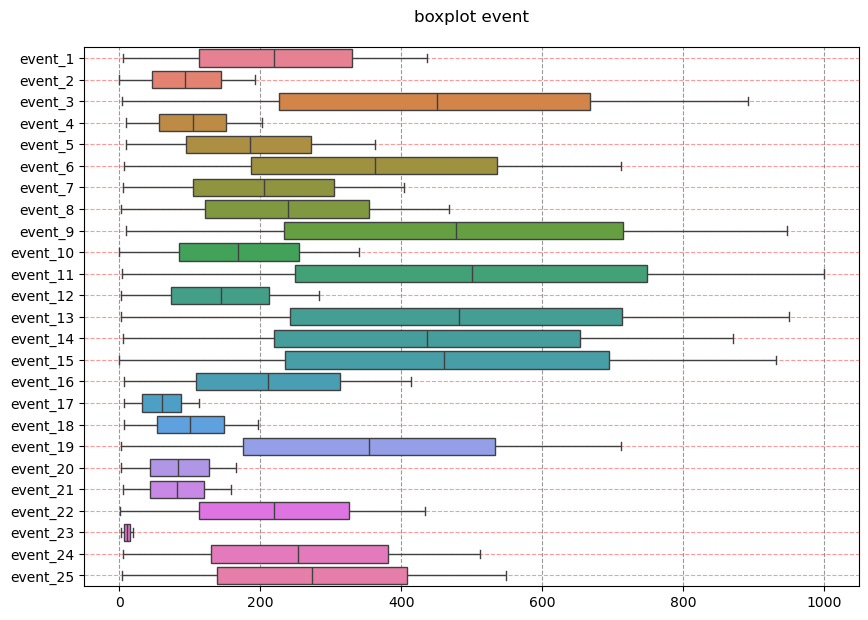

In [8]:
plt.figure(figsize = (10, 7))
ax =\
sns.boxplot(
    data = data.iloc[:, 1:],
    orient = 'y'
)

plt.title('boxplot event\n')
plt.grid(visible = True,
         axis = 'y',
         alpha = 0.4,   
         color = 'red',
         linestyle = '--')
plt.grid(visible = True,
         axis = 'x',
         alpha = 0.4,   
         color = 'black',
         linestyle = '--')
plt.show()

Аномалий в каждом отдельном event нет (нет выраженных выбросов)

### Количество кликов по каждому event

Text(0.5, 0, 'сумма кликов (млн.)')

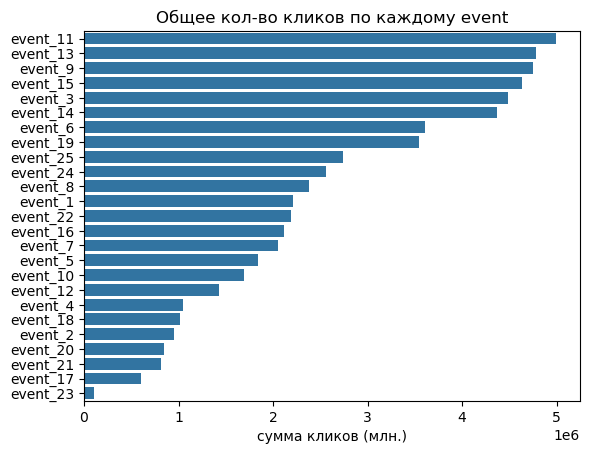

In [9]:
sns.barplot(
    data.iloc[:, 1:].sum(axis = 0).sort_values(ascending = False),
    orient = 'y')

plt.title('Общее кол-во кликов по каждому event')
plt.xlabel('сумма кликов (млн.)')

Можно предположить, что последовательность событий такая же как и воронка событий т.е. 

- первое событие которое может сделать пользователь - event_11
- второе - event-13 и тд.

### процент перехода с одного event на следующий и процент от начального event (event_11)

In [10]:
data_to_ploty =\
pd.DataFrame(data.iloc[:, 1:].sum(axis = 0)\
                             .sort_values(ascending = False))\
                             .reset_index()\
                             .rename({0: 'sum', 'index': 'event_name'}, axis = 1)

data_to_ploty['shifted_sum'] = data_to_ploty['sum'].shift(-1)
data_to_ploty['процент перехода с текущего event на следующий'] = ((data_to_ploty['shifted_sum'] / data_to_ploty['sum'])*100).round(2)
data_to_ploty['процент от первоначального event'] = ((data_to_ploty['sum'] / 4996224)*100).round(2)
data_to_ploty

,event_name,sum,shifted_sum,процент перехода с текущего event на следующий,процент от первоначального event
0,event_11,4996224,4779633.0,95.66,100.00
1,event_13,4779633,4753080.0,99.44,95.66
2,event_9,4753080,4631930.0,97.45,95.13
3,event_15,4631930,4487349.0,96.88,92.71
4,event_3,4487349,4373147.0,97.46,89.81
5,event_14,4373147,3609933.0,82.55,87.53
6,event_6,3609933,3543805.0,98.17,72.25
7,event_19,3543805,2740672.0,77.34,70.93
8,event_25,2740672,2557565.0,93.32,54.85
9,event_24,2557565,2380821.0,93.09,51.19


Text(0.5, 1.0, 'Доля пользователей, переходящих от текущего до последующих\n')

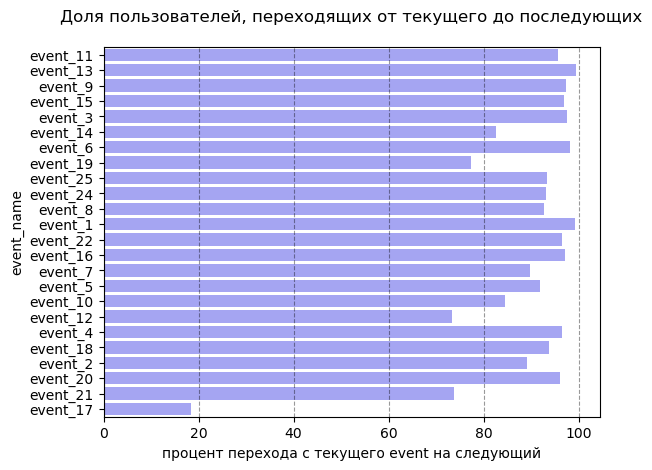

In [11]:
sns.barplot(
    data = data_to_ploty.iloc[:-1,],
    x = 'процент перехода с текущего event на следующий',
    y = 'event_name',
    color = 'blue',
    alpha = 0.4
)

plt.grid(visible = True,
         axis = 'x',
         alpha = 0.4,   
         color = 'black',
         linestyle = '--')
plt.title('Доля пользователей, переходящих от текущего до последующих\n')

Text(0.5, 1.0, 'Доля всех пользователей, переходящих от начального (event_11) до последующих\n')

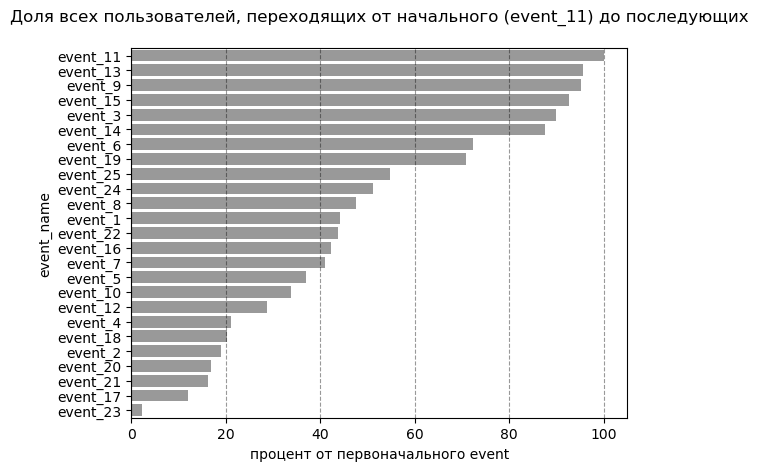

In [12]:
sns.barplot(
    data = data_to_ploty,
    x = 'процент от первоначального event',
    y = 'event_name',
    color = 'black',
    alpha = 0.4
)

plt.grid(visible = True,
         axis = 'x',
         alpha = 0.4,   
         color = 'black',
         linestyle = '--')
plt.title('Доля всех пользователей, переходящих от начального (event_11) до последующих\n')

In [13]:
'''predict_spisok_posled_events = list(data_to_ploty['event_name'].values)
print(predict_spisok_posled_events)'''

"predict_spisok_posled_events = list(data_to_ploty['event_name'].values)\nprint(predict_spisok_posled_events)"

Т.к. у нас есть возможность расмотреть только частоту кликов и не более ---> будем исходить из ПРЕДПОЛОЖЕНИЙ:

- Последовательность действий можно определить частотой кликабельности, отсортированной по убыванию
- Если действие по кликабильности схожее с предыдущим, то оно скорее всего последовательное (но не факт, пока отмечаем как последовательное, для дальнейшего анализа)


По предварительному визуальному осмотру barplot:

- Последовательность: 11-13-9-6-19-25-1-22-16-7-5

# 3. Анализ последовательности действий

### 3.1 Матрица совместного появления событий

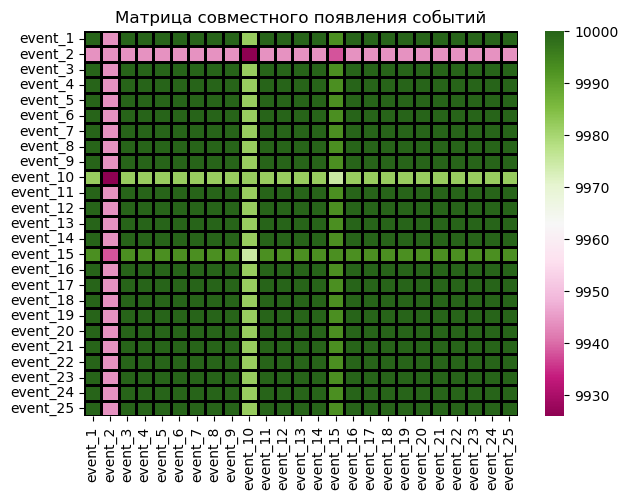

In [14]:
events = data.columns[1:]
co_occurrence_matrix = np.zeros((len(events), len(events)))
for user_id in data['Visitor_id'].unique():
    user_events = data[data['Visitor_id'] == user_id][events].values
    for i in range(len(events)):
        for j in range(len(events)):
            if user_events[0, i] > 0 and user_events[0, j] > 0:
                co_occurrence_matrix[i, j] += 1

plt.figure(figsize = (7, 5))

sns.heatmap(co_occurrence_matrix,
            cmap = 'PiYG',
            linewidths = 1, 
            linecolor ='black', 
            # mask = mask,
            xticklabels = events,
            yticklabels = events
)
plt.title('Матрица совместного появления событий')
plt.show()

Text(0.5, 1.0, 'Количество 0-значений в датасете\n')

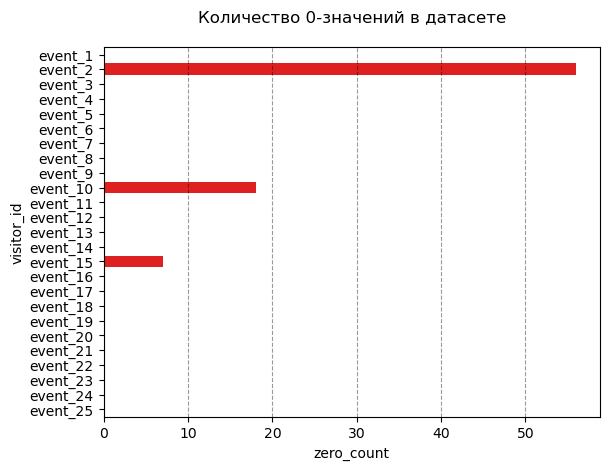

In [15]:
data_to_plot_2 = pd.DataFrame((data.iloc[:, 1:] == 0).sum())\
                                                     .reset_index()\
                                                     .rename({0: 'zero_count', 'index': 'visitor_id'}, axis = 1)
sns.barplot(
    data = data_to_plot_2,
    x = 'zero_count',
    y = 'visitor_id',
    color = 'red'
    )
plt.grid(visible = True,
         axis = 'x',
         alpha = 0.4,   
         color = 'black',
         linestyle = '--')
plt.title('Количество 0-значений в датасете\n')

- причины розовых крестов в матрицы - нулевые значения в признаках
- матрица совместного появления не повлияла на предположение о последовательности 11-13-9-6-19-25-1-22-16-7-5

### Кластеризация пользователей

Text(0.5, 1.0, 'Распределение всех выполненных событий (сумма событий по пользователям)')

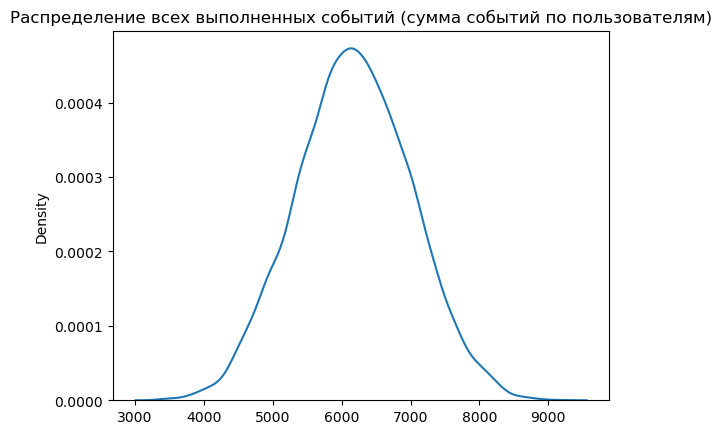

In [16]:
sns.kdeplot(data.iloc[:,1:].sum(axis = 1))
plt.title('Распределение всех выполненных событий (сумма событий по пользователям)')

кластреризируем пользователей на три группы

- 'слабо активные'
- 'гиперактивные'
- 'умеренно активные'

In [17]:
data['total_events'] = data.iloc[:, 1:].sum(axis = 1)

def clusters_difference(x):
    if x <= 5000:
        return 'слабо активные'
    if x >= 7500:
        return 'гиперактивные'
    else:
        return 'умеренно активные'

data['total_events'] = data['total_events'].map(clusters_difference)
data = data.rename({'total_events': 'cluster_name'}, axis = 1)
data['cluster_name'].value_counts()

cluster_name
умеренно активные    8610
слабо активные        834
гиперактивные         556
Name: count, dtype: int64

In [18]:
data_to_clustering = data.iloc[:, 1:].groupby('cluster_name').mean()
data_to_clustering = data_to_clustering.sort_values(by = 'event_5', ascending = False)
data_to_clustering

,event_1,event_2,event_3,event_4,event_5,event_6,event_7,event_8,event_9,event_10,...,event_16,event_17,event_18,event_19,event_20,event_21,event_22,event_23,event_24,event_25
cluster_name,,,,,,,,,,,,,,,,,,,,,
гиперактивные,250.507194,102.708633,614.478417,115.951439,209.044964,466.223022,227.732014,282.852518,659.845324,194.982014,...,257.338129,61.582734,109.167266,456.789568,92.028777,88.044964,251.519784,11.291367,314.482014,331.746403
умеренно активные,222.604181,95.126597,454.003020,104.737398,184.479791,361.793961,206.854936,239.107549,478.748084,170.498606,...,211.109756,60.170267,101.556214,357.505459,84.822532,81.422184,220.287340,11.014053,256.630894,275.907201
слабо активные,182.615108,89.055156,283.852518,99.623501,167.046763,282.574341,172.842926,197.648681,316.768585,140.834532,...,182.847722,57.809353,93.231415,253.846523,79.223022,76.703837,184.653477,11.056355,207.579137,216.618705


Text(0, 0.5, 'среднее кол-во кликов')

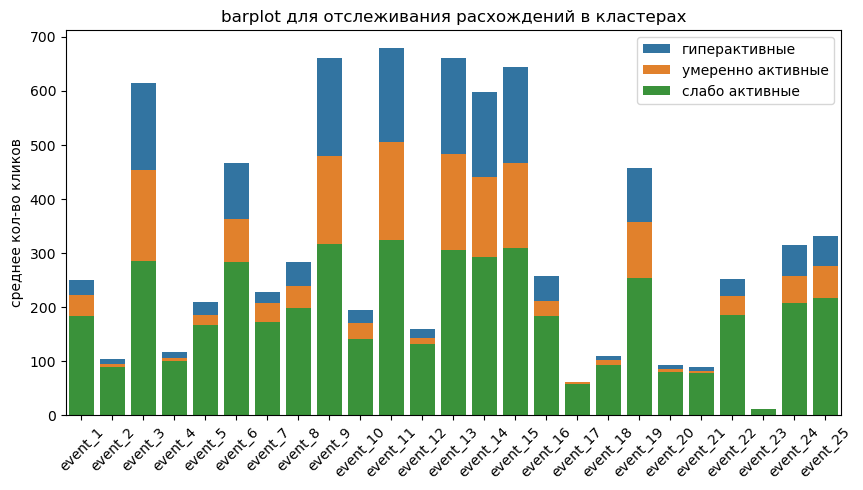

In [19]:
plt.figure(figsize = (10, 5))
for cluster_name in data_to_clustering.index:
    sns.barplot(data_to_clustering.loc[cluster_name,:],
                label = cluster_name,
                )
    # sns.lineplot(data_to_clustering.loc[cluster_name,:])
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1, 1))
plt.title('barplot для отслеживания расхождений в кластерах')
plt.ylabel('среднее кол-во кликов')

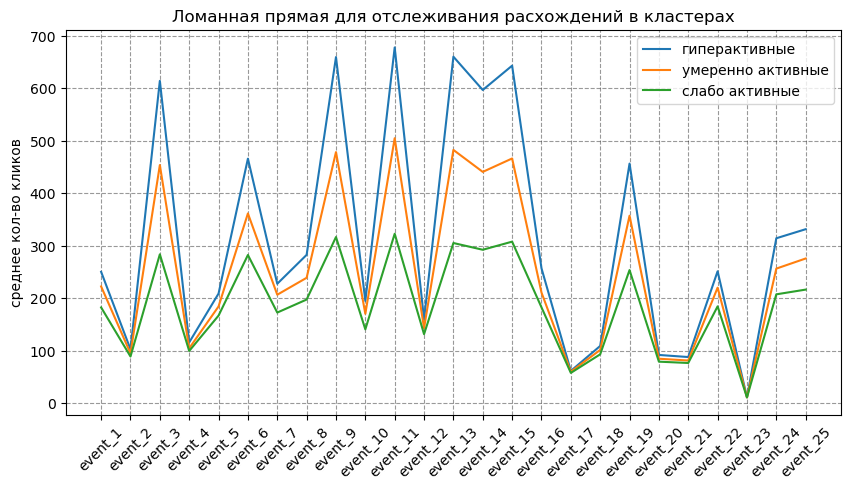

In [20]:
plt.figure(figsize = (10, 5))
for cluster_name in data_to_clustering.index:
    sns.lineplot(data_to_clustering.loc[cluster_name,:],
                 label = cluster_name)
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Ломанная прямая для отслеживания расхождений в кластерах')
plt.ylabel('среднее кол-во кликов')
plt.grid(visible = True,
         axis = 'x',
         alpha = 0.4,   
         color = 'black',
         linestyle = '--')
plt.grid(visible = True,
         axis = 'y',
         alpha = 0.4,   
         color = 'black',
         linestyle = '--')

Построим корреляционный блок

In [21]:
data.iloc[:,1:-1].corr()['event_5']

event_1    -0.010465
event_2     0.002510
event_3    -0.003939
event_4     0.001653
event_5     1.000000
event_6    -0.014824
event_7     0.006909
event_8    -0.015940
event_9    -0.003249
event_10   -0.003749
event_11    0.005351
event_12   -0.012206
event_13    0.014479
event_14    0.011564
event_15   -0.001013
event_16    0.005382
event_17    0.008453
event_18   -0.003627
event_19   -0.014072
event_20   -0.010761
event_21    0.001698
event_22   -0.019362
event_23   -0.012158
event_24   -0.004606
event_25   -0.004373
Name: event_5, dtype: float64

нет ярковыраженных расхождений в предположении о последовательности ----> 11-13-9-6-19-25-1-22-16-7-5 

In [22]:
predict_spisok_posled_events = ['event_11' ,'event_13' ,'event_9' , 'event_6', 'event_19', 'event_25', 'event_1', 'event_22', 'event_16', 'event_7', 'event_5']

# Модель МО

In [23]:
pd.DataFrame(data.iloc[:,1:-1].corr()['event_5']\
                              .sort_values(ascending = False))\
                              .reset_index()\
                              .rename({'index': 'event_name', 'event_5': 'corr_koeff'}, axis = 1)

,event_name,corr_koeff
0,event_5,1.000000
1,event_13,0.014479
2,event_14,0.011564
3,event_17,0.008453
4,event_7,0.006909
5,event_16,0.005382
6,event_11,0.005351
7,event_2,0.002510
8,event_21,0.001698
9,event_4,0.001653


In [24]:
data_to_plot_4 =\
pd.merge(
    data_to_ploty[['event_name', 'процент от первоначального event']],
    pd.DataFrame(data.iloc[:,1:-1].corr()['event_5']\
                              .sort_values(ascending = False))\
                              .reset_index()\
                              .rename({'index': 'event_name', 'event_5': 'corr_koeff'}, axis = 1),
    on = 'event_name'                   
).sort_values(by = 'corr_koeff', ascending = False)
data_to_plot_4

,event_name,процент от первоначального event,corr_koeff
15,event_5,36.91,1.000000
1,event_13,95.66,0.014479
5,event_14,87.53,0.011564
23,event_17,12.02,0.008453
14,event_7,41.07,0.006909
13,event_16,42.30,0.005382
0,event_11,100.00,0.005351
20,event_2,19.02,0.002510
22,event_21,16.29,0.001698
18,event_4,21.00,0.001653


Text(0.5, 1.0, 'Корреляция event_5 и других event')

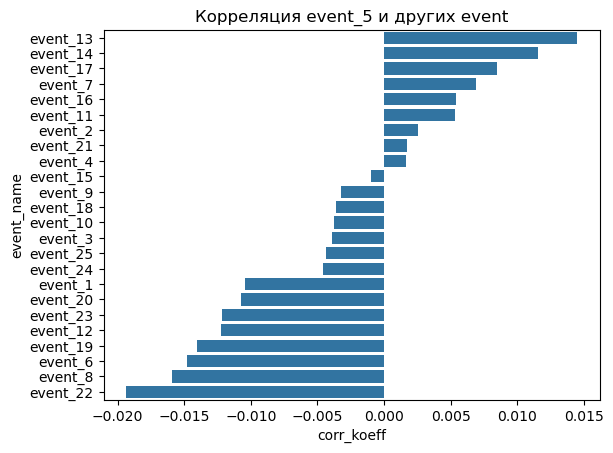

In [25]:
sns.barplot(
    data = data_to_plot_4[['event_name', 'corr_koeff']].sort_values(by = 'corr_koeff', ascending = False).iloc[1:,:],
    y = 'event_name',
    x = 'corr_koeff' 
)
plt.title('Корреляция event_5 и других event')

In [26]:
print('Возможные последовательности event`s')
data_to_show =\
pd.DataFrame({'кореляционное предположение': data_to_plot_4[data_to_plot_4['corr_koeff'] >= 0]['event_name'].to_list()[1:] + [None],
 'частотное предположение': predict_spisok_posled_events[:-1]})
data_to_show

Возможные последовательности event`s


,кореляционное предположение,частотное предположение
0,event_13,event_11
1,event_14,event_13
2,event_17,event_9
3,event_7,event_6
4,event_16,event_19
5,event_11,event_25
6,event_2,event_1
7,event_21,event_22
8,event_4,event_16
9,None,event_7


Оставим частотную последовательность и добавим положительные корреляционные event и отбросим отрицательные корр. event

Итого: 11-13-14-25-16-7-5

# Модель МО

In [27]:
# разделение датасета
y = data['event_5']
X = data.iloc[:,1:-1].drop('event_5', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(
    X,y,
    shuffle = True,
    random_state = 42
)

In [28]:
print(len(X_train), len(X_test))

7500 2500


In [29]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [30]:
predicts = model.predict(X_test)

In [31]:
# результаты модели

data_model_itog = {
    'y_true': y_test,
    'y_pred': predicts
}

data_model_itog = pd.DataFrame(data_model_itog)
def probas(row):
    proba = row['y_pred'] / row['y_true']
    if proba > 1:
        return 1
    else:
        return proba

data_model_itog['probas'] = data_model_itog.apply(probas, axis = 1)
print('RMSE: ', mean_squared_error(y_pred = data_model_itog['y_pred'],
                                   y_true = data_model_itog['y_true'],
                                   squared = False))
data_model_itog.head()

RMSE:  104.78587699494622


,y_true,y_pred,probas
6252,355,169.99,0.478845
4684,132,144.76,1.000000
1731,292,171.69,0.587979
4742,304,178.12,0.585921
4521,337,182.76,0.542315


In [32]:
# важность фичей
data_to_pd = {
    'event_name': X_train.columns,
    'importance': model.feature_importances_
}
data_importance =\
pd.DataFrame(data_to_pd).sort_values(by = 'importance', ascending = False)
data_importance.head(11)

,event_name,importance
13,event_15,0.046146
6,event_8,0.044345
22,event_24,0.044287
17,event_19,0.044243
20,event_22,0.043778
11,event_13,0.043486
7,event_9,0.043322
23,event_25,0.043281
9,event_11,0.043273
2,event_3,0.043232


Text(0.5, 1.0, 'Важность признаков для модели RandomForest')

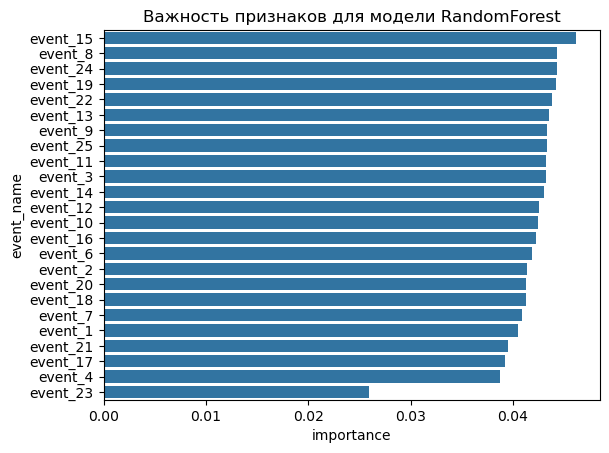

In [33]:
sns.barplot(
    data = data_importance,
    x = 'importance',
    y = 'event_name'
)
plt.title('Важность признаков для модели RandomForest')

- есть фичи, которые в корелляционном анализе показывнли отрицательный наклон (event_8 / event_19 / event_22)
- нет ни одной фичи, которые попали в список после event_5 ---> важность фичи предполагает ее расположение до event_5
- есть расхождения с частотным анализов (с т.з. последовательности)

In [34]:
predict_spisok_posled_events

['event_11',
 'event_13',
 'event_9',
 'event_6',
 'event_19',
 'event_25',
 'event_1',
 'event_22',
 'event_16',
 'event_7',
 'event_5']

In [35]:
data_to_plot_4[data_to_plot_4['event_name'].isin(predict_spisok_posled_events)]

,event_name,процент от первоначального event,corr_koeff
15,event_5,36.91,1.000000
1,event_13,95.66,0.014479
14,event_7,41.07,0.006909
13,event_16,42.30,0.005382
0,event_11,100.00,0.005351
2,event_9,95.13,-0.003249
8,event_25,54.85,-0.004373
11,event_1,44.20,-0.010465
7,event_19,70.93,-0.014072
6,event_6,72.25,-0.014824


Text(0.5, 1.0, 'Фичи, которые негативно влияют на event_5 и их корреляция')

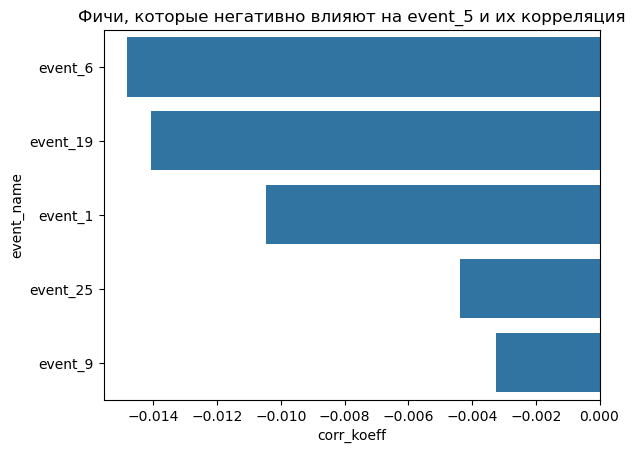

In [36]:
data_to_plot_4 = data_to_plot_4[data_to_plot_4['event_name'].isin(predict_spisok_posled_events)][['event_name', 'corr_koeff']].sort_values(by = 'corr_koeff', ascending = True).iloc[1:,:]
data_to_plot_4 = data_to_plot_4[data_to_plot_4['corr_koeff'] < 0]

sns.barplot(
    data = data_to_plot_4,
    y = 'event_name',
    x = 'corr_koeff' 
)
plt.title('Фичи, которые негативно влияют на event_5 и их корреляция')